## Question 1:

According to you, what are the main building blocks of a data pipeline?

The main building blocks of a data pipeline includes:
1. **Data warehouse**, which acts as file storage for all the data;
2. **Computing engine**, which transforms the data;
3. **Orchestrator**, which orchestrates the ETL pipeline, training and register of a model;
4. **Feature store** (optional), which stores the calculated features, both offline and online, to train and score a model;
5. **Model registry** (optional), which stores the models for online scoring;
6. **Streaming platform** (optional), where the online data can flow, e.g., back to data warehouse.

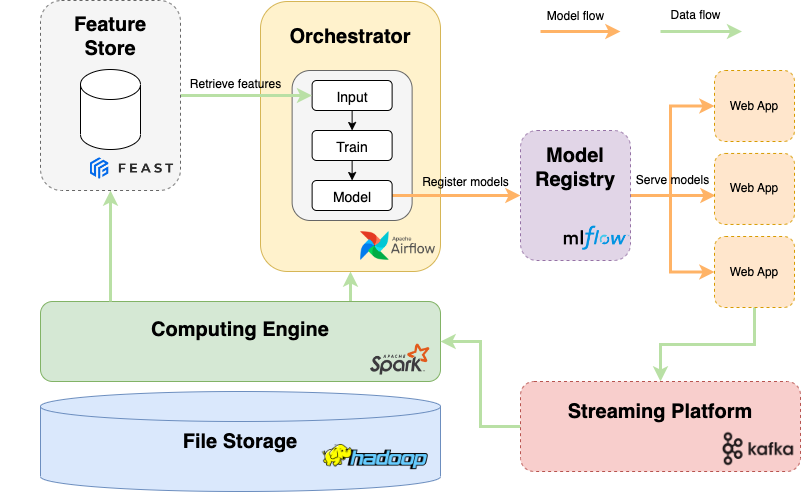

In [14]:
from IPython.display import Image
Image(filename='pix/data-pipeline-building-blocks.png') 

## Question 2:

Write a function to return an iterator which can be piped to transformation functions. The iterator should accept a parser as an argument and create a basic parsed output. Please do not use the pandas python package.

In [17]:
import csv


def base_iterator(parser):
    
    with open("data/RetailCustomerSales.csv") as csvfile:
        reader = csv.reader(csvfile, delimiter=";")

        # store the headers in a separate variable
        header = next(reader)

        for row in reader:
            yield parser(row)

In [18]:
def dummy_parser(row):
    print(row)

### Show the first 10 rows

In [20]:
dummy_data = base_iterator(dummy_parser)

for i in range(10):
    next(dummy_data)

['1000001', 'P00069042', 'F', '0-17', '10', 'A', '2', '0', '3', '', '', '8370']
['1000001', 'P00248942', 'F', '0-17', '10', 'A', '2', '0', '1', '6', '14', '15200']
['1000001', 'P00087842', 'F', '0-17', '10', 'A', '2', '0', '12', '', '', '1422']
['1000001', 'P00085442', 'F', '0-17', '10', 'A', '2', '0', '12', '14', '', '1057']
['1000002', 'P00285442', 'M', '55+', '16', 'C', '4+', '0', '8', '', '', '7969']
['1000003', 'P00193542', 'M', '26-35', '15', 'A', '3', '0', '1', '2', '', '15227']
['1000004', 'P00184942', 'M', '46-50', '7', 'B', '2', '1', '1', '8', '17', '19215']
['1000004', 'P00346142', 'M', '46-50', '7', 'B', '2', '1', '1', '15', '', '15854']
['1000004', 'P0097242', 'M', '46-50', '7', 'B', '2', '1', '1', '16', '', '15686']
['1000005', 'P00274942', 'M', '26-35', '20', 'A', '1', '1', '8', '', '', '7871']


## Question 3:

In the attached data, an age column contains age buckets. How would you transform this feature to make it more suitable for modelling? What different options would you consider? Pick one to implement and use the iterator from Question 2 to apply the transformation.

To tranform the age buckets, there are several options:
1. Use a unique string to represent each bucket, but it cannot be used for a regression model, as a numeric value is required;
2. Use a unique integer to represent each bucket, but we want the age buckets to be independent from each other, and avoid introducing potential quantitative relationship between various age buckets;
3. Use one-hot encoding to encode each bucket;

Based on the reasons listed above, we choose one-hot encoding to create independent categorical labels for age buckets.

In [4]:
from enum import Enum
import numpy as np


class Age(Enum):
    between_0_and_17 = "0-17"
    between_18_and_25 = "18-25"
    between_26_and_35 = "26-35"
    between_36_and_45 = "36-45"
    between_46_and_50 = "46-50"
    between_51_and_55 = "51-55"
    above_55 = "55+"

    @classmethod
    def list(cls):
        return list(map(lambda age_bucket: age_bucket.value, cls))


def one_hot_encode(num_classes):
    return np.eye(num_classes).tolist()


ages = Age.list()
encoded_ages = one_hot_encode(len(ages))


def transform_age_buckets(row):

    age_idx = ages.index(row[3])
    encoded_age = encoded_ages[age_idx]
    row[3] = encoded_age
    
    return row

### Show the first 10 rows

In [23]:
encoded_data = base_iterator(transform_age_buckets)

for i in range(10):
    print(next(encoded_data))

['1000001', 'P00069042', 'F', [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '10', 'A', '2', '0', '3', '', '', '8370']
['1000001', 'P00248942', 'F', [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '10', 'A', '2', '0', '1', '6', '14', '15200']
['1000001', 'P00087842', 'F', [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '10', 'A', '2', '0', '12', '', '', '1422']
['1000001', 'P00085442', 'F', [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], '10', 'A', '2', '0', '12', '14', '', '1057']
['1000002', 'P00285442', 'M', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], '16', 'C', '4+', '0', '8', '', '', '7969']
['1000003', 'P00193542', 'M', [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], '15', 'A', '3', '0', '1', '2', '', '15227']
['1000004', 'P00184942', 'M', [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], '7', 'B', '2', '1', '1', '8', '17', '19215']
['1000004', 'P00346142', 'M', [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], '7', 'B', '2', '1', '1', '15', '', '15854']
['1000004', 'P0097242', 'M', [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], '7', 'B', '2', '1', '1', '16', '', '15686']
['

## Question 4:

To enable modelling for the data analyst working on the prediction, please transform the dataset into a structure where each record in the dataset corresponds to a unique customer. What schema design do you choose and why?

The schema is designed as a list of `RetailCustomer`, where each `RetailCustomer` contains the customer's `id` which uniquely identifies this customer, and the customer-related information, such as `sex`, `age`, etc..., finally a list of `Item`, where each item can be identified uniquely by its `id`, and contains item-related information, such as `category` and `amount`.

In [24]:
from dataclasses import dataclass, is_dataclass, asdict
from typing import List


@dataclass
class Item:
    id: str
    category_one: int
    category_two: int
    category_three: int
    amount: int

    def __eq__(self, other):
        return self.id == other.id

    def __hash__(self):
        return hash(self.id)

    
@dataclass
class RetailCustomer:
    id: int = None
    sex: str = None
    age: list = None
    profession: int = None
    city_type: str = None
    years_in_city: int = None
    have_children: bool = None
    items: List[Item] = None

    def __eq__(self, other):
        return self.id == other.id

    def __hash__(self):
        return hash(self.id)

In [25]:
from collections import defaultdict


def transform_dataset(rows):

    transformed_rows = defaultdict(RetailCustomer)

    for row in rows:
        customer_id = row[0]
        current_customer = transformed_rows[customer_id]
            
        if not current_customer.id:
            first_item = Item(row[1], row[8], row[9], row[10], row[11])
            transformed_rows[customer_id] = RetailCustomer(row[0], row[2], row[3], row[4], row[5], row[6], row[7], [first_item])
        
        else:
            next_item = Item(row[1], row[8], row[9], row[10], row[11])
            transformed_rows[customer_id].items.append(next_item)                        
        
    return list(transformed_rows.values())

### Show the transformed data for the first customer

In [31]:
encoded_rows = base_iterator(transform_age_buckets)

transformed_rows = transform_dataset(encoded_rows)

In [32]:
print("customer id: ", transformed_rows[0].id)
print("customer sex: ", transformed_rows[0].sex)
print("customer age: ", transformed_rows[0].age)
print("customer profession: ", transformed_rows[0].profession)
print("customer city_type: ", transformed_rows[0].city_type)
print("customer years_in_city: ", transformed_rows[0].years_in_city)
print("customer have_children: ", transformed_rows[0].have_children)

customer id:  1000001
customer sex:  F
customer age:  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
customer profession:  10
customer city_type:  A
customer years_in_city:  2
customer have_children:  0


In [29]:
print("this customer has bought:")
transformed_rows[0].items

this customer has bought:


[Item(id='P00069042', category_one='3', category_two='', category_three='', amount='8370'),
 Item(id='P00248942', category_one='1', category_two='6', category_three='14', amount='15200'),
 Item(id='P00087842', category_one='12', category_two='', category_three='', amount='1422'),
 Item(id='P00085442', category_one='12', category_two='14', category_three='', amount='1057'),
 Item(id='P00085942', category_one='2', category_two='4', category_three='8', amount='12842'),
 Item(id='P00102642', category_one='4', category_two='8', category_three='9', amount='2763'),
 Item(id='P00110842', category_one='1', category_two='2', category_three='5', amount='11769'),
 Item(id='P00004842', category_one='3', category_two='4', category_three='12', amount='13645'),
 Item(id='P00117942', category_one='5', category_two='15', category_three='', amount='8839'),
 Item(id='P00258742', category_one='5', category_two='', category_three='', amount='6910'),
 Item(id='P00142242', category_one='8', category_two='', c

### Save the transformed data

In [34]:
from dataclass_csv import DataclassWriter

with open("data/TransformedRetailCustomerSales.csv", "w") as csvfile:
    writer = DataclassWriter(csvfile, transformed_rows, RetailCustomer)
    writer.write()

## Question 5:

Suppose you are given the task to build the data pipeline for this analytical use case. You can assume that the customer data is coming from a relational database and the transactions are coming from a Pub/Sub stream.
What are the important design criteria for the data pipeline?
How would you design and deploy it?

The import design criteria may include the following aspects:
1. How to orchestrate the model training from the relational database;
2. If the transactions are stateful or stateless;
3. If there comes a surge of traffic, how to scale up the webapps;
4. If the model quality degrades, how to automatically trigger retrain;
5. How to ingest the transaction data back into the relational database, e.g., to update the training data;

The model training will be orchestrated by an orchestrator, e.g., Airflow, which can read the training data from the relational database and train the model. The trained model can be registered in a model registry, e.g., MLflow, from where the chosen model can be packaged into a container together with a webapp that can do the online inference.

For online inference, if feature store is needed, the online features can be materialized from the database and be backed up by some changelog which can support quick recovery from failover or scale up of a webapp. The online features can be then stored in cache, e.g., Redis, in each webapp for quick access.

The metrics can be monitored for each webapp, e.g., response time or model quality. If there is a surge of traffic, each webapp can be quickly scaled up from its container registry, and each webapp's corresponding state can be restored quickly from the changelog. If a model quality degrades, the retrain can be triggered by the orchestrator.

The online data can be ingested into the stream and flow back into the database to update the training data.

## [Optional] Question 6:

What else would you do to the dataset? Would you think of other transformations to apply to support analysis? You don’t have to implement your suggestions, just share your thinking.

For the dataset, we can also do the following:
1. Identify the outliers or null values for each column, as they will impact the quality of the trained model;
2. Calculate the histogram of the dataset, so we can compare the training and inference data to check if there exists data drift.